<h3>Problema 1 <br> A</h3>
numarul de respondenti (de la care s-au colectate informatiile)



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk as nltk
import PIL as pil

df = pd.read_csv("surveyDataSience.csv", low_memory=False)


nr_respondenti = len(df)
print("Nr respondenti =", nr_respondenti)

print(df.shape[0])



Nr respondenti = 25974
25974


<h3>B</h3>
numar si tipul informatiilor (atributelor, proprietatilor) detinute pentru un respondent


In [6]:
nr_informatii = len(df.columns)
print("Nr informatii =", nr_informatii)


df.shape[1]
df.dtypes.keys().tolist()

Nr informatii = 369


['Time from Start to Finish (seconds)',
 'Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q6',
 'Q7_Part_1',
 'Q7_Part_2',
 'Q7_Part_3',
 'Q7_Part_4',
 'Q7_Part_5',
 'Q7_Part_6',
 'Q7_Part_7',
 'Q7_Part_8',
 'Q7_Part_9',
 'Q7_Part_10',
 'Q7_Part_11',
 'Q7_Part_12',
 'Q7_OTHER',
 'Q8',
 'Q9_Part_1',
 'Q9_Part_2',
 'Q9_Part_3',
 'Q9_Part_4',
 'Q9_Part_5',
 'Q9_Part_6',
 'Q9_Part_7',
 'Q9_Part_8',
 'Q9_Part_9',
 'Q9_Part_10',
 'Q9_Part_11',
 'Q9_Part_12',
 'Q9_OTHER',
 'Q10_Part_1',
 'Q10_Part_2',
 'Q10_Part_3',
 'Q10_Part_4',
 'Q10_Part_5',
 'Q10_Part_6',
 'Q10_Part_7',
 'Q10_Part_8',
 'Q10_Part_9',
 'Q10_Part_10',
 'Q10_Part_11',
 'Q10_Part_12',
 'Q10_Part_13',
 'Q10_Part_14',
 'Q10_Part_15',
 'Q10_Part_16',
 'Q10_OTHER',
 'Q11',
 'Q12_Part_1',
 'Q12_Part_2',
 'Q12_Part_3',
 'Q12_Part_4',
 'Q12_Part_5',
 'Q12_OTHER',
 'Q13',
 'Q14_Part_1',
 'Q14_Part_2',
 'Q14_Part_3',
 'Q14_Part_4',
 'Q14_Part_5',
 'Q14_Part_6',
 'Q14_Part_7',
 'Q14_Part_8',
 'Q14_Part_9',
 'Q14_Part_10',
 'Q14_Part_11',
 'Q14_OTHE

<h3>C</h3>
numarul de respondenti pentru care se detin date complete

In [2]:

#.dropa() -> ia datele unde este tot completat
nr_respondenti_date_full = len(df.dropna())
print("Nr respondenti_full =", nr_respondenti_date_full)

Nr respondenti_full = 1


<h3>D</h3>
durata medie a anilor de studii superioare pentru acesti respondenti (cea efectiva sau cea estimata), durata medie a anilor de studii pentru respondentii din Romania si durata medie a anilor de studii pentru respondentii din Romania care sunt femei. Comparati rezultatele obtinute pentru cele trei grupuri de respondenti. Se presupune ca studiile de licenta dureaza 3 ani, cele de master 2 ani si cele de doctorat 3 ani.

In [3]:
studii_superioare_map = {
    'Master’s degree': 2,
    'Bachelor’s degree': 3,
    'Doctoral degree': 3,
    'Some college/university study without earning a bachelor’s degree':0,
    'I prefer not to answer':0
}

durata_medie = df['Q4'].map(studii_superioare_map).mean()
print("Durata medie a anilor de studii superioare: ", durata_medie)

romania_df = df[df['Q3'] == 'Romania']
durata_medie_romania = romania_df['Q4'].map(studii_superioare_map).mean()
print("Durata medie a anilor de studii superioare din Romania:", durata_medie_romania)

femei_df = romania_df[romania_df['Q2'] == 'Woman']
durata_medie_romania_femei = femei_df['Q4'].map(studii_superioare_map).mean()
print("Durata medie a anilor de studii superioare a femeilor din Romania:", durata_medie_romania_femei )

Durata medie a anilor de studii superioare:  2.3166375615177013
Durata medie a anilor de studii superioare din Romania: 2.107142857142857
Durata medie a anilor de studii superioare a femeilor din Romania: 2.0


<h3>E</h3>
numarul de respondenti femei din Romania pentru care se detin date complete


In [48]:
romania_df = df[df['Q3'] == 'Romania']

romania_femei_df = romania_df[romania_df['Q2'] == 'Woman']

romania_femei_complet_df = romania_femei_df.dropna()

numar_respondenti_femei_romania_complet = len(romania_femei_complet_df)
print("Numarul de respondenti femei din Romania pentru care se detin date complete =", numar_respondenti_femei_romania_complet)

Numarul de respondenti femei din Romania pentru care se detin date complete = 0


<h3>F</h3>
numarul de femei din Romania care programeaza in Python, precum si intervalul de varsta cu cele mai multe femei care programeaza in Python? Dar in C++? Comparati rezultatele obtinute pentru cele doua limbaje de programare.

In [7]:
romania = df[df['Q3'] == 'Romania']

femei= romania[romania['Q2'] == 'Woman']

prog_python= femei[femei['Q7_Part_1']=='Python']

print("Nr de femei din Romania care programeaza in python: "+ str(len(prog_python)))
age_interval_counts = prog_python['Q1'].value_counts()
print("Interval de varsta:", age_interval_counts)
print("Interval de varsta cu cele mai multe femei:", age_interval_counts.idxmax())

#########################################################################################
print("######################################################################################")
prog_cpp= femei[femei['Q7_Part_5']=='C++']

print("Nr de femei din Romania care programeaza in c++: "+ str(len(prog_cpp)))
age_interval_counts2 = prog_cpp['Q1'].value_counts()
print("Interval de varsta:", age_interval_counts2)
print("Interval de varsta cu cele mai multe femei:", age_interval_counts2.idxmax())


Nr de femei din Romania care programeaza in python: 12
Interval de varsta: Q1
35-39    5
22-24    3
25-29    2
18-21    1
40-44    1
Name: count, dtype: int64
Interval de varsta cu cele mai multe femei: 35-39
######################################################################################
Nr de femei din Romania care programeaza in c++: 4
Interval de varsta: Q1
18-21    1
25-29    1
22-24    1
35-39    1
Name: count, dtype: int64
Interval de varsta cu cele mai multe femei: 18-21


<h3>G</h3>
domeniul de valori posibile si valorile extreme pentru fiecare atribut/proprietate (feature). In cazul proprietatilor nenumerice, cate valori posibile are fiecare astfel de proprietate

In [3]:
feature_info = {}

for column in df.columns:
    try:
        pd.to_numeric(df[column][2])
        min_value = pd.to_numeric(df[column][2:]).min()
        max_value = pd.to_numeric(df[column][2:]).max()
        feature_info[column] = {
            'type': 'numeric',
            'min': min_value,
            'max': max_value
        }
    except ValueError:
        unique_values = df[column][2:].unique()
        feature_info[column] = {
            'type': 'non-numeric',
            'unique_values_count': len(unique_values),
            'unique_values': unique_values
        }
for feature, info in feature_info.items():
    print(f"Feature: {feature}")
    if info['type'] == 'numeric':
        print(f"  Type: {info['type']}")
        print(f"  Min: {info['min']}")
        print(f"  Max: {info['max']}")
    else:
        print(f"  Type: {info['type']}")
        print(f"  Unique Values Count: {info['unique_values_count']}")
        print(f"  Unique Values: {info['unique_values']}")
    print()

Feature: Time from Start to Finish (seconds)
  Type: numeric
  Min: 120
  Max: 2488653

Feature: Q1
  Type: non-numeric
  Unique Values Count: 11
  Unique Values: ['50-54' '22-24' '45-49' '25-29' '18-21' '30-34' '40-44' '35-39' '70+'
 '55-59' '60-69']

Feature: Q2
  Type: non-numeric
  Unique Values Count: 5
  Unique Values: ['Man' 'Woman' 'Nonbinary' 'Prefer not to say' 'Prefer to self-describe']

Feature: Q3
  Type: non-numeric
  Unique Values Count: 66
  Unique Values: ['Indonesia' 'Pakistan' 'Mexico' 'India' 'Russia' 'Turkey' 'Australia'
 'Nigeria' 'Greece' 'Belgium' 'Japan' 'Egypt' 'Singapore' 'Brazil'
 'Poland' 'China' 'Iran, Islamic Republic of...'
 'United States of America' 'Italy' 'Viet Nam' 'Israel' 'Peru'
 'South Africa' 'Other' 'Spain' 'Bangladesh'
 'United Kingdom of Great Britain and Northern Ireland' 'France'
 'Switzerland' 'Algeria' 'Tunisia' 'Argentina' 'Sweden' 'Colombia'
 'I do not wish to disclose my location' 'Canada' 'Chile' 'Netherlands'
 'Ukraine' 'Saudi Arabia

<h3>H</h3>
transformati informatiile despre vechimea in programare in numar de ani (folositi in locul intervalului, mijlocul acestuia) si apoi calculati momentele de ordin 1 si 2 pentru aceasta variabila (minim, maxim, media, deviatia standard, mediana). Ce se poate spune despre aceasta variabila?

In [9]:
experienta_map = {
    '< 1 years': 0.5,
    '1-3 years': 2,
    '3-5 years': 4,
    '5-10 years': 7.5,
    '10-20 years': 15,
    '20+ years': 25
}

df['Q6_years'] = df['Q6'].map(experienta_map)

min_years = df['Q6_years'].min()
max_years = df['Q6_years'].max()
mean_years = df['Q6_years'].mean()
std_dev_years = df['Q6_years'].std()
median_years = df['Q6_years'].median()

print("Vechimea in programare minima: ", min_years)
print("Vechimea in programare maxima: ", max_years)
print("Vechimea in programare medie: ", mean_years)
print("Deviatia standard a vechimii in programare: ", std_dev_years)
print("Mediana vechimii in programare: ", median_years)

Vechimea in programare minima:  0.5
Vechimea in programare maxima:  25.0
Vechimea in programare medie:  5.499579006455234
Deviatia standard a vechimii in programare:  6.842720555614415
Mediana vechimii in programare:  2.0


<h1>1B</h1>

<h3>A</h3>
distributia respondentilor care programeaza in Python pe categorii de varsta

Distributia respondentilor care programeaza in Python pe categorii de varsta
Q1
18-21    4420
25-29    4283
22-24    4204
30-34    2805
35-39    1978
40-44    1486
45-49    1054
50-54     714
55-59     434
60-69     400
70+        82
Name: count, dtype: int64


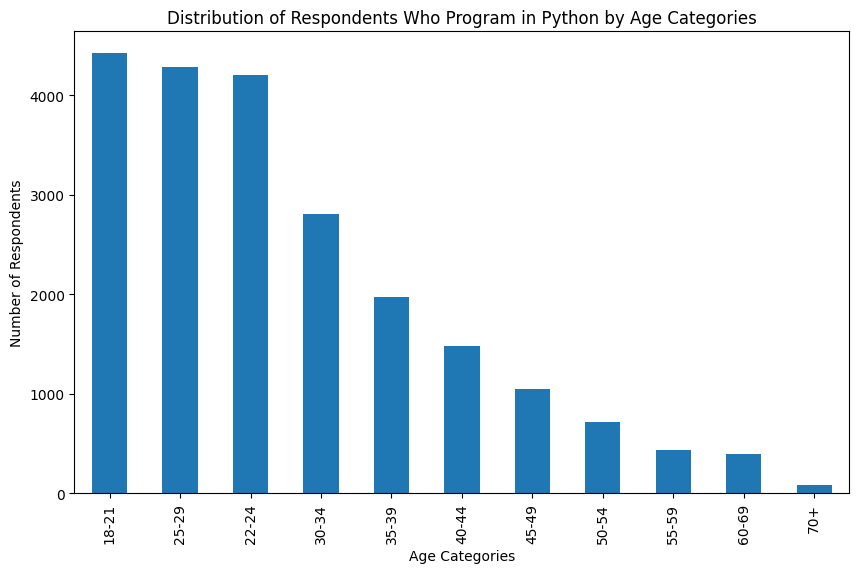

In [9]:
import matplotlib.pyplot as plt

python_prog = df[df['Q7_Part_1'] == 'Python']

categorii_varsta = python_prog['Q1'].value_counts()

print("Distributia respondentilor care programeaza in Python pe categorii de varsta")
print(categorii_varsta)

plt.figure(figsize=(10, 6))
categorii_varsta.plot(kind='bar')
plt.xlabel('Age Categories')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Respondents Who Program in Python by Age Categories')
plt.show()

<h3>B</h3>
distributia respondentilor din Romania care programeaza in Python pe categorii de varsta


Distributia respondentilor din Romania care programeaza in Python pe categorii de varsta:
Q1
22-24    11
40-44     8
35-39     8
25-29     7
30-34     6
50-54     4
45-49     4
18-21     3
Name: count, dtype: int64


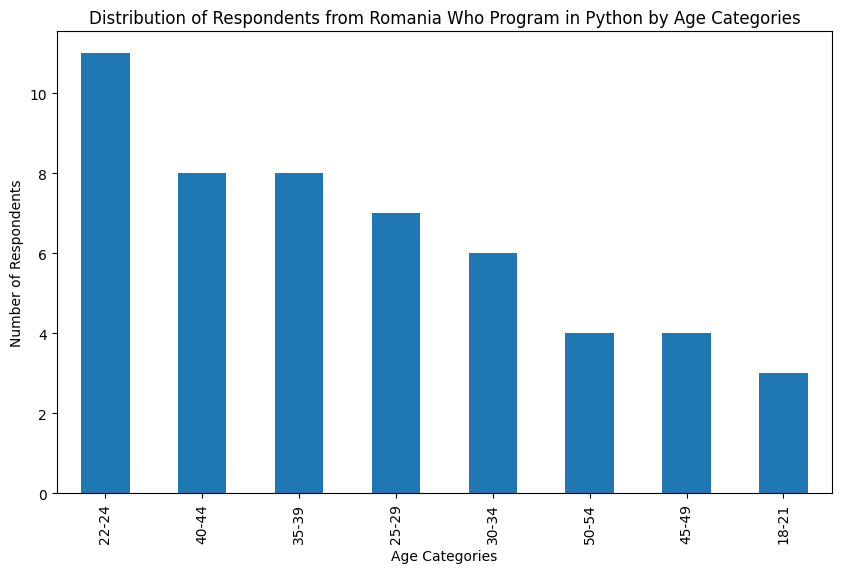

In [10]:
python_prog = df[df['Q7_Part_1'] == 'Python']

romania_python_prog = python_prog[python_prog['Q3'] == 'Romania']

categorii_varsta_romania = romania_python_prog['Q1'].value_counts()

print("Distributia respondentilor din Romania care programeaza in Python pe categorii de varsta:")
print(categorii_varsta)

plt.figure(figsize=(10, 6))
categorii_varsta_romania.plot(kind='bar')
plt.xlabel('Age Categories')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Respondents from Romania Who Program in Python by Age Categories')
plt.show()

<h3>C</h3>
distributia respondentilor femei din Romania care programeaza in Python pe categorii de varsta


Distributia respondentilor femei din Romania care programeaza in Python pe categorii de varsta
Q1
22-24    11
40-44     8
35-39     8
25-29     7
30-34     6
50-54     4
45-49     4
18-21     3
Name: count, dtype: int64


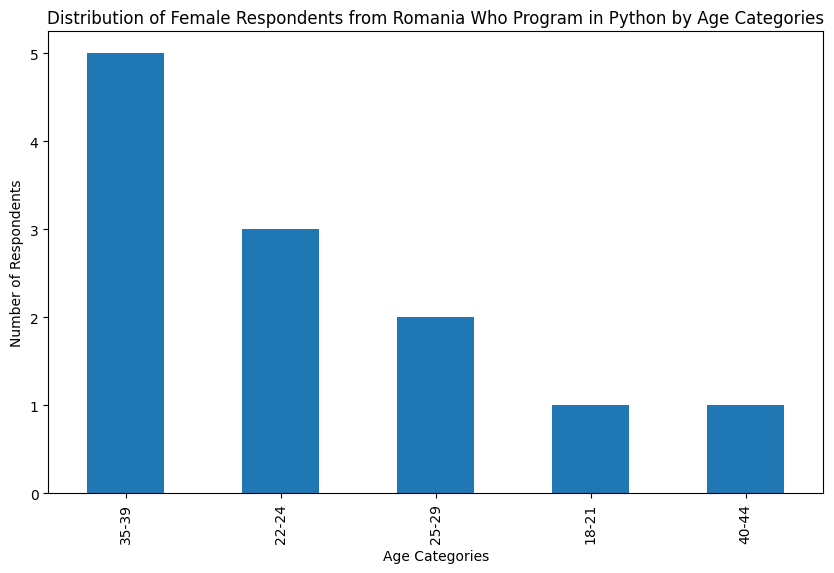

In [11]:
femei_python_prog = romania_python_prog[romania_python_prog['Q2'] == 'Woman']

categorii_varsta_femei = femei_python_prog['Q1'].value_counts()

print("Distributia respondentilor femei din Romania care programeaza in Python pe categorii de varsta")
print(categorii_varsta)

plt.figure(figsize=(10, 6))
categorii_varsta_femei.plot(kind='bar')
plt.xlabel('Age Categories')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Female Respondents from Romania Who Program in Python by Age Categories')
plt.show()

<h3>D</h3>
respondentii care pot fi considerati "outlieri" din punct de vedere al vechimii in programare (puteti folositi un boxplot pentru a identifica aceste valori)

Outliers in terms of programming experience:
              Q6  Q6_years  Q6_years_normalized
2      20+ years      25.0                  1.0
4      20+ years      25.0                  1.0
5      < 1 years       0.5                  0.0
6      < 1 years       0.5                  0.0
12     < 1 years       0.5                  0.0
...          ...       ...                  ...
25947  < 1 years       0.5                  0.0
25951  < 1 years       0.5                  0.0
25954  < 1 years       0.5                  0.0
25955  < 1 years       0.5                  0.0
25964  20+ years      25.0                  1.0

[7741 rows x 3 columns]


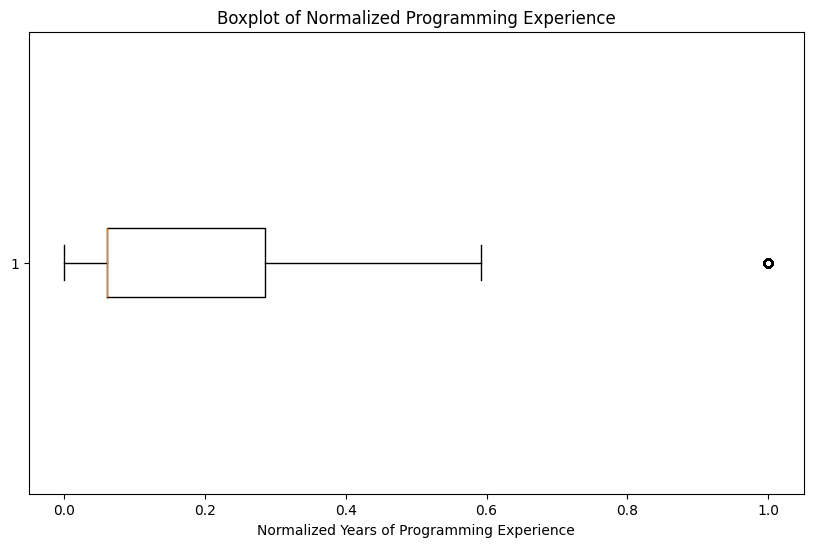

In [4]:
experienta_map = {
    '< 1 years': 0.5,
    '1-3 years': 2,
    '3-5 years': 4,
    '5-10 years': 7.5,
    '10-20 years': 15,
    '20+ years': 25
}

df['Q6_years'] = df['Q6'].map(experienta_map)

min_years = df['Q6_years'].min()
max_years = df['Q6_years'].max()
df['Q6_years_normalized'] = (df['Q6_years'] - min_years) / (max_years - min_years)

threshold = 0.05
outliers = df[(df['Q6_years_normalized'] < threshold) | (df['Q6_years_normalized'] > 1 - threshold)]

print("Outliers in terms of programming experience:")
print(outliers[['Q6', 'Q6_years', 'Q6_years_normalized']])

plt.figure(figsize=(10, 6))
plt.boxplot(df['Q6_years_normalized'].dropna(), vert=False)
plt.xlabel('Normalized Years of Programming Experience')
plt.title('Boxplot of Normalized Programming Experience')
plt.show()